In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
data = pd.read_excel(r"\Downloads\employee_burnout_analysis-AI.xlsx")

In [9]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [10]:
data.shape

(22750, 9)

In [11]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [12]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [13]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [15]:
data_cleaned = data.dropna(subset=['Burn Rate'])

In [16]:
data_cleaned.shape

(21626, 9)

In [17]:
data_cleaned.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1278
Mental Fatigue Score    1945
Burn Rate                  0
dtype: int64

In [18]:
data_cleaned=data_cleaned.dropna()

In [19]:
data_cleaned.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Name: Burn Rate, dtype: float64

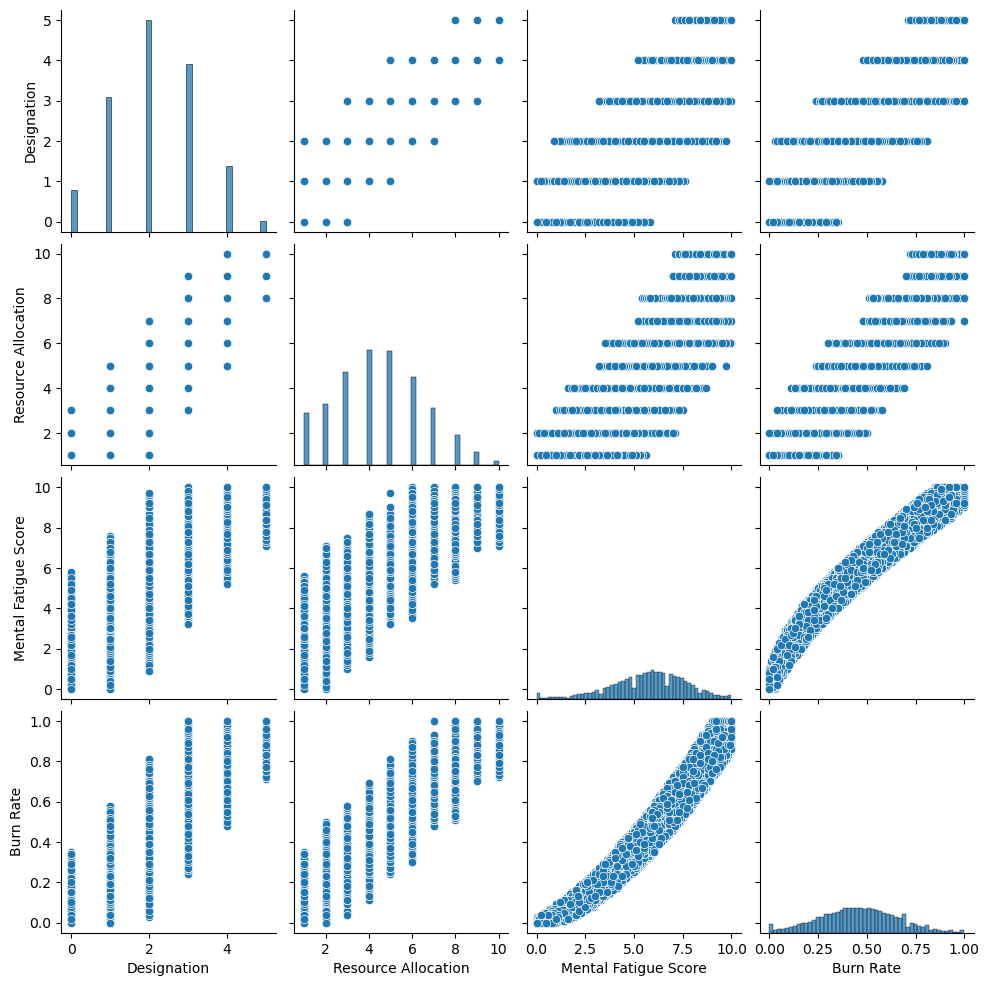

In [21]:
sns.pairplot(data_cleaned)
plt.show()

In [22]:
data_cleaned=data_cleaned.drop('Employee ID',axis=1)

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

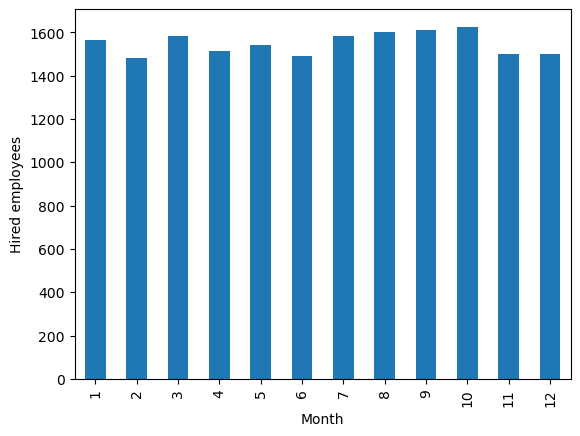

In [23]:
print(f"Min date {data_cleaned['Date of Joining'].min()}")
print(f"Max date {data_cleaned['Date of Joining'].max()}")
# Convert Date of Joining to datetime format
data_cleaned["Date of Joining"] = pd.to_datetime(data_cleaned["Date of Joining"])
# Group by month and count the number of employees hired each month
data_cleaned["Date of Joining"].groupby(data_cleaned['Date of Joining'].dt.month).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")
     

Index(['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate'],
      dtype='object')
Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


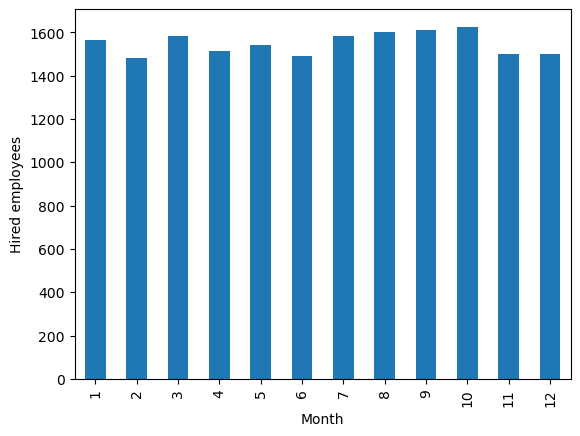

In [24]:
# Print columns to check if 'Date of Joining' is present
print(data_cleaned.columns)
# Check if 'Date of Joining' exists before accessing
if 'Date of Joining' in data_cleaned.columns:
    print(f"Min date {data_cleaned['Date of Joining'].min()}")
    print(f"Max date {data_cleaned['Date of Joining'].max()}")
else:
    print("Column 'Date of Joining' not found.")
# Create a copy of data_cleaned for the next section
data_month = data_cleaned.copy()
# Check if the DataFrame is not empty
if not data_month.empty:
    # Check again if 'Date of Joining' exists before modifying
    if 'Date of Joining' in data_month.columns:
        data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
        data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")
    else:
        print("Column 'Date of Joining' not found. Cannot plot.")
else:
    print("DataFrame is empty. Cannot plot.")

In [25]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data_cleaned))
# Specify time unit as nanoseconds when converting to datetime64
data_cleaned["Days"] = data_cleaned['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data_cleaned.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [26]:
numeric_data = data_cleaned.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [27]:
data_cleaned = data_cleaned.drop(['Date of Joining','Days'], axis = 1)

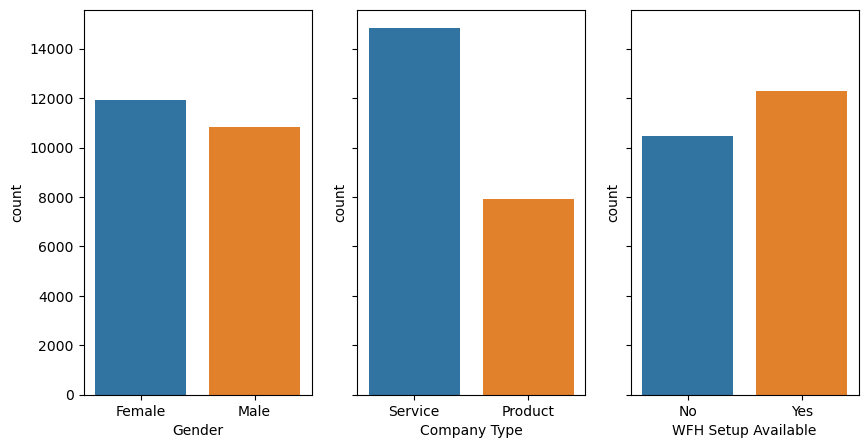

In [28]:
#Analysing Catagorical variables
cat_columns = data_cleaned.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

In [29]:
if all(col in data_cleaned.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data_cleaned = pd.get_dummies(data_cleaned, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
    data_cleaned.head()
    encoded_columns = data_cleaned.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    print(data_cleaned.columns)

In [30]:
y=data_cleaned['Burn Rate']
X=data_cleaned.drop('Burn Rate',axis=1)

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

# Scale X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [33]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [34]:
#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:",r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031625756229926656
Root Mean Squared Error: 0.05623678176240765
Mean Absolute Error: 0.04605840467455547
R-squared Score: 0.9182311349661127


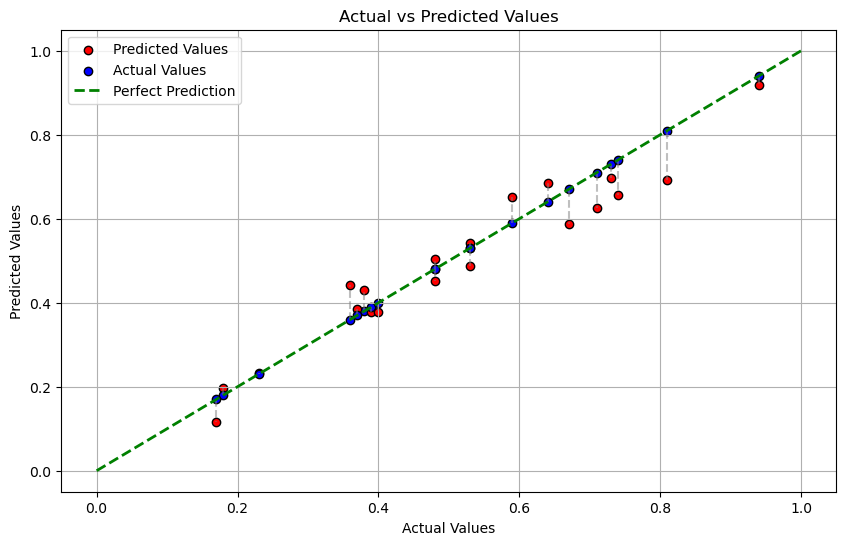

In [35]:
# Sample 20 equally spaced points
indices = np.linspace(0, len(y_test) - 1, 20, dtype=int)
y_test_sampled = y_test.iloc[indices]
y_pred_sampled = y_pred[indices]

# Create a scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot the sampled points with different colors
for i in range(len(y_test_sampled)):
    plt.scatter(y_test_sampled.iloc[i], y_pred_sampled[i], color='red', edgecolor='k', label='Predicted Values' if i == 0 else "")
    plt.scatter(y_test_sampled.iloc[i], y_test_sampled.iloc[i], color='blue', edgecolor='k', label='Actual Values' if i == 0 else "")
    plt.plot([y_test_sampled.iloc[i], y_test_sampled.iloc[i]], [y_test_sampled.iloc[i], y_pred_sampled[i]], color='gray', linestyle='--', alpha=0.5)

# Plot the line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add legend
plt.legend(loc='best')

# Show the plot
plt.grid(True)
plt.show()
